In [38]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [39]:
competences_esb = pd.read_csv("competence_esb.csv")
competences_ref = pd.read_csv("competence_ref.csv")

In [40]:
competences_esb.head()

,Parcours,Compétences
0,LSGC,Maîtriser les techniques d’élaboration des sup...
1,LSGM,Analyser les évolutions de l’environnement des...
2,LMAD,Aider les organisations à créer de la valeur o...
3,BI,Maîtriser l’utilisation de l’outil informatiqu...
4,BIS,Concevoir et développer une solution décisionn...


In [41]:
competences_ref.head(6)

,métier,compétences
0,Conception - développement produits d'assuranc...,analyser les données du marché/secteur de l'as...
1,Conseil clientèle en assurances (C1102),analyser les besoins en assurance du client et...
2,Courtage en assurances (C1103),mettre en oeuvre des actions commerciales selo...
3,Direction d'exploitation en assurances (C1104),"définir une stratégie commerciale,définir/suiv..."
4,Études actuarielles en assurances (C1105),proposer des axes d'amélioration de gestion (f...
5,Expertise risques en assurances (C1106),"identifier les secteurs (industries, grande di..."


Calcul de similarité:

In [42]:

# Télécharger les mots d'arrêt en français si nécessaire
nltk.download('stopwords')

# Utiliser les mots d'arrêt en français
french_stopwords = list(stopwords.words('french'))


# Extraire les compétences des deux fichiers
competence_esb_skills = competences_esb['Compétences'].dropna()
competence_ref_skills = competences_ref['compétences'].dropna()
competence_ref_jobs = competences_ref['métier']

# Concaténer les compétences de competence_esb et competence_ref
all_skills = pd.concat([competence_esb_skills, competence_ref_skills])

# Appliquer TfidfVectorizer pour transformer les compétences en vecteurs
vectorizer = TfidfVectorizer(stop_words=french_stopwords)
skills_matrix = vectorizer.fit_transform(all_skills)

# Calculer la similarité cosinus entre les compétences de competence_esb et competence_ref
cos_sim_matrix = cosine_similarity(skills_matrix[:len(competence_esb_skills)], skills_matrix[len(competence_esb_skills):])

# Créer un tableau croisé pour afficher les métiers et parcours en fonction de la similarité
similarity_df = pd.DataFrame(cos_sim_matrix, index=competences_esb['Parcours'], columns=competence_ref_jobs)

# Afficher les résultats (par exemple les 10 premiers résultats)
print(similarity_df.head(10))






métier    Conception - développement produits d'assurances (C1101)  \
Parcours                                                             
LSGC                                               0.016711          
LSGM                                               0.033410          
LMAD                                               0.056524          
BI                                                 0.022299          
BIS                                                0.023121          
MKD                                                0.013349          
CCA                                                0.020575          
MDSI                                               0.023150          
GAMMA                                              0.088809          
FIND                                               0.017391          

métier    Conseil clientèle en assurances (C1102)  \
Parcours                                            
LSGC                                     0.014759   


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asma\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Tableau de contingence: 

In [43]:
# Créer un tableau croisé pour afficher les métiers et parcours en fonction de la similarité
similarity_df = pd.DataFrame(cos_sim_matrix, index=competences_esb['Parcours'], columns=competence_ref_jobs)

# Afficher les résultats (par exemple les 10 premiers résultats)
similarity_df.head(10)



métier,Conception - développement produits d'assurances (C1101),Conseil clientèle en assurances (C1102),Courtage en assurances (C1103),Direction d'exploitation en assurances (C1104),Études actuarielles en assurances (C1105),Expertise risques en assurances (C1106),Indemnisations en assurances (C1107),Management de groupe et de service en assurances (C1108),Rédaction et gestion en assurances (C1109),Souscription d'assurances (C1110),...,Direction des systèmes d'information (M1803),Études et développement de réseaux de télécoms (M1804),Études et développement informatique (M1805),Conseil et maîtrise d'ouvrage en systèmes d'information (M1806),Exploitation de systèmes de communication (M1807),Production et exploitation de systèmes d'information (M1810),Gestion des opérations de circulation internationale des marchandises (N1202),Conception et organisation de la chaîne logistique (N1301),Direction de site logistique (N1302),Intervention technique d'exploitation logistique (N1303)
Parcours,,,,,,,,,,,,,,,,,,,,,
LSGC,0.016711,0.014759,0.000000,0.052876,0.051769,0.020765,0.017057,0.000000,0.018575,0.042065,...,0.018278,0.017291,0.039570,0.012328,0.000000,0.000000,0.019709,0.000000,0.040469,0.041130
LSGM,0.033410,0.023787,0.058422,0.071541,0.021453,0.013219,0.004880,0.072338,0.000000,0.074387,...,0.034246,0.016357,0.024459,0.025779,0.015330,0.028131,0.000000,0.015550,0.048476,0.033863
LMAD,0.056524,0.016426,0.044081,0.023485,0.079874,0.052675,0.000000,0.029759,0.000000,0.017032,...,0.053768,0.011811,0.037869,0.020906,0.010760,0.039707,0.015111,0.026556,0.084332,0.042342
BI,0.022299,0.023192,0.007453,0.024640,0.027508,0.006654,0.000000,0.014930,0.018634,0.008244,...,0.071330,0.049155,0.130427,0.052373,0.032442,0.062333,0.012569,0.042818,0.052570,0.033342
BIS,0.023121,0.016698,0.000000,0.027474,0.006892,0.000000,0.000000,0.013392,0.000000,0.000000,...,0.033369,0.022184,0.096803,0.000000,0.065313,0.061305,0.000000,0.026334,0.014292,0.013642
MKD,0.013349,0.000000,0.007113,0.040959,0.023710,0.005845,0.025045,0.042816,0.000000,0.004589,...,0.020285,0.048447,0.055807,0.045426,0.012785,0.006141,0.009827,0.009009,0.026508,0.025039
CCA,0.020575,0.007746,0.013521,0.045011,0.044104,0.043124,0.006279,0.061729,0.000000,0.041234,...,0.104637,0.072131,0.060040,0.033582,0.051822,0.057154,0.048133,0.047407,0.048516,0.031399
MDSI,0.023150,0.000000,0.052163,0.030943,0.033454,0.022528,0.000000,0.019997,0.000000,0.013750,...,0.145027,0.080356,0.016141,0.044923,0.109773,0.066376,0.017665,0.008978,0.006600,0.006300
GAMMA,0.088809,0.090787,0.019336,0.050528,0.093334,0.013592,0.023912,0.035085,0.000000,0.046151,...,0.011910,0.020358,0.042720,0.007803,0.052530,0.045686,0.000000,0.017261,0.023815,0.031544


Application du test Chi-2:

In [40]:
from scipy.stats import chi2_contingency

# Appliquer le test du Chi-2
chi2, p_value, dof, expected = chi2_contingency(similarity_df)

# Afficher les résultats
print("Résultats du test du Chi-2 :")
print(f"Statistique Chi-2 : {chi2}")
print(f"p-value : {p_value}")
print(f"Degrés de liberté : {dof}")
print("\nTableau des fréquences attendues (si indépendance) :")
print(pd.DataFrame(expected, index=similarity_df.index, columns=similarity_df.columns))


Résultats du test du Chi-2 :
Statistique Chi-2 : 14.611780487635148
p-value : 1.0
Degrés de liberté : 690

Tableau des fréquences attendues (si indépendance) :
métier    Conception - développement produits d'assurances (C1101)  \
Parcours                                                             
LSGC                                               0.040044          
LSGM                                               0.032071          
LMAD                                               0.029559          
BI                                                 0.031838          
BIS                                                0.019173          
MKD                                                0.022803          
CCA                                                0.049940          
MDSI                                               0.033241          
GAMMA                                              0.032823          
FIND                                               0.040240          


Interprétation du test du chi-2:
p-value > 0.05, ce qui signifie que les parcours et les métiers sont indépendants

In [31]:
# Créer un tableau où chaque métier contribue 1 au parcours ayant la valeur maximale
def assign_max_to_parcours(column):
    # Trouver l'index (parcours) ayant la valeur maximale pour chaque colonne (métier)
    max_index = column.idxmax()
    # Créer une série où seul l'index correspondant à max_index reçoit 1, les autres 0
    return column.apply(lambda x: 1 if x == column[max_index] else 0)

# Appliquer la logique par colonne
contribution_df = similarity_df.apply(assign_max_to_parcours, axis=0)

# Afficher les résultats
contribution_df.head(10)



métier,Conception - développement produits d'assurances (C1101),Conseil clientèle en assurances (C1102),Courtage en assurances (C1103),Direction d'exploitation en assurances (C1104),Études actuarielles en assurances (C1105),Expertise risques en assurances (C1106),Indemnisations en assurances (C1107),Management de groupe et de service en assurances (C1108),Rédaction et gestion en assurances (C1109),Souscription d'assurances (C1110),...,Direction des systèmes d'information (M1803),Études et développement de réseaux de télécoms (M1804),Études et développement informatique (M1805),Conseil et maîtrise d'ouvrage en systèmes d'information (M1806),Exploitation de systèmes de communication (M1807),Production et exploitation de systèmes d'information (M1810),Gestion des opérations de circulation internationale des marchandises (N1202),Conception et organisation de la chaîne logistique (N1301),Direction de site logistique (N1302),Intervention technique d'exploitation logistique (N1303)
Parcours,,,,,,,,,,,,,,,,,,,,,
LSGC,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
LSGM,0,0,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
LMAD,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
BI,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
BIS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MKD,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CCA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
MDSI,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,1,0,0,0,0
GAMMA,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
from scipy.stats import chi2_contingency

# Appliquer le test du Chi-2
chi2, p_value, dof, expected = chi2_contingency(contribution_df)

# Afficher les résultats
print("Résultats du test du Chi-2 :")
print(f"Statistique Chi-2 : {chi2}")
print(f"p-value : {p_value}")
print(f"Degrés de liberté : {dof}")
print("\nTableau des fréquences attendues (si indépendance) :")
print(pd.DataFrame(expected, index=contribution_df.index, columns=contribution_df.columns))


Résultats du test du Chi-2 :
Statistique Chi-2 : 700.0000000000001
p-value : 0.387505260079782
Degrés de liberté : 690

Tableau des fréquences attendues (si indépendance) :
métier    Conception - développement produits d'assurances (C1101)  \
Parcours                                                             
LSGC                                               0.200000          
LSGM                                               0.157143          
LMAD                                               0.042857          
BI                                                 0.042857          
BIS                                                0.042857          
MKD                                                0.042857          
CCA                                                0.100000          
MDSI                                               0.057143          
GAMMA                                              0.114286          
FIND                                               0.1714

Visualisation des résultats avec le heatmap:

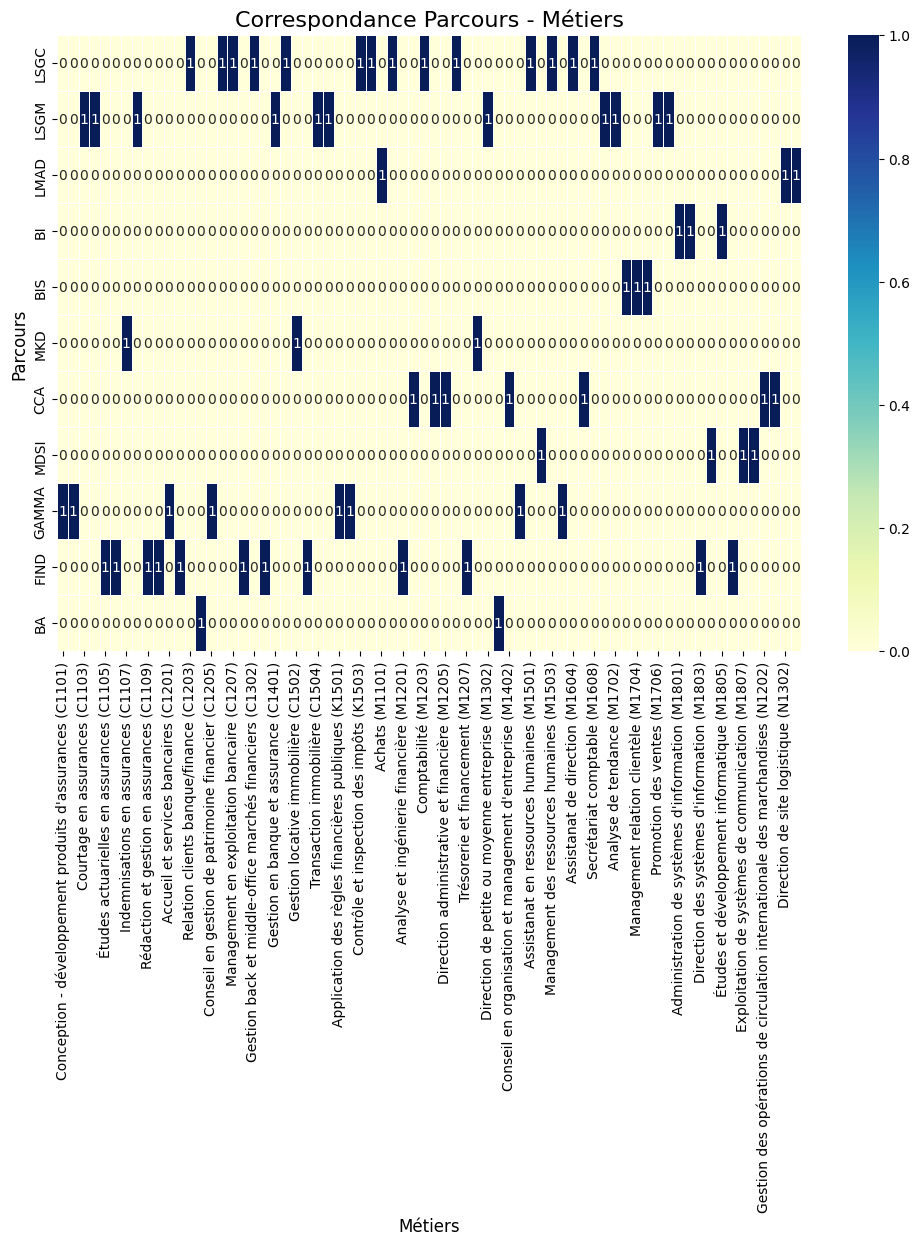

In [32]:
# Créer une figure
plt.figure(figsize=(12, 8))

# Dessiner la heatmap
sns.heatmap(contribution_df, annot=True, cmap="YlGnBu", cbar=True, linewidths=.5)

# Ajouter des titres et labels
plt.title("Correspondance Parcours - Métiers", fontsize=16)
plt.xlabel("Métiers", fontsize=12)
plt.ylabel("Parcours", fontsize=12)

# Afficher la heatmap
plt.show()


Régression logistique:

In [48]:
from sklearn.preprocessing import LabelEncoder

# Encoder les métiers (cible)
le = LabelEncoder()
encoded_jobs = le.fit_transform(competences_ref['métier'])

In [49]:
from sklearn.model_selection import train_test_split

# Diviser les données en X (compétences) et y (métiers)
X = skills_matrix[:len(competence_esb_skills)]  # Les compétences de competence_esb
y = encoded_jobs[:len(competence_esb_skills)]  # Les métiers correspondants

# Diviser en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [50]:
from sklearn.linear_model import LogisticRegression

# Initialiser et entraîner le modèle
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [56]:
from sklearn.metrics import classification_report, accuracy_score,precision_score,recall_score,confusion_matrix

# Faire des prédictions sur l'ensemble de test
y_pred = model.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print('Accuracy Logistic Regression {0:.3f}'.format(accuracy_score(y_test,y_pred)))
print('Precision Logistic Regression {0:.3f}'.format(precision_score(y_test,y_pred)))
print('Recall Logistic Regression {0:.3f}'.format(recall_score(y_test,y_pred)))





Exactitude du modèle : 0.00
Rapport de classification :


TypeError: Encoders require their input argument must be uniformly strings or numbers. Got ['int', 'str']

In [44]:
from sklearn.cluster import KMeans

In [30]:
# Calculer la similarité cosinus entre les compétences de competence_esb et competence_ref
similarity_matrix = cosine_similarity(
    skills_matrix[:len(competence_esb_skills)],  # Vecteurs des compétences ESB
    skills_matrix[len(competence_esb_skills):]  # Vecteurs des compétences REF
)


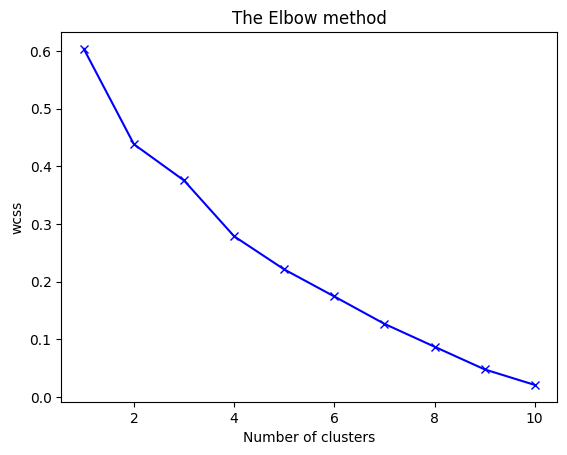

In [45]:
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init='k-means++',random_state=0)
    kmeans.fit(similarity_df)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss, 'bx-')
plt.title('The Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

Le "coude" semble se situer autour de k = 4 ou 5

In [46]:
from kneed import KneeLocator
k = KneeLocator(range(1, 11), wcss, curve="convex", direction="decreasing")
k.elbow

np.int64(4)

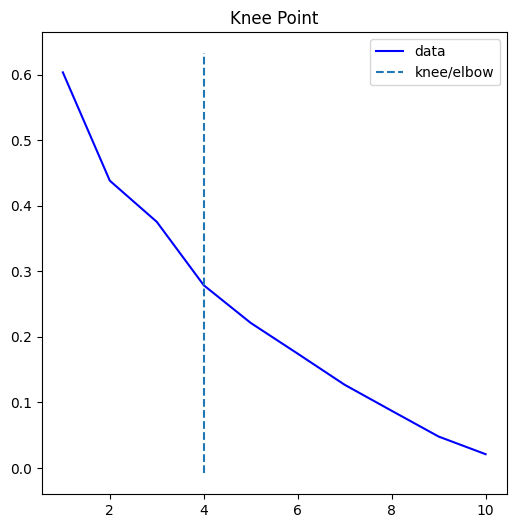

In [47]:
k.plot_knee()
plt.show()

In [48]:
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(similarity_df)

In [49]:
# Ajouter les clusters au DataFrame competences_esb
competences_esb['Cluster'] = clusters

# Afficher les regroupements
competences_esb.head()

,Parcours,Compétences,Cluster
0,LSGC,Maîtriser les techniques d’élaboration des sup...,2
1,LSGM,Analyser les évolutions de l’environnement des...,1
2,LMAD,Aider les organisations à créer de la valeur o...,1
3,BI,Maîtriser l’utilisation de l’outil informatiqu...,0
4,BIS,Concevoir et développer une solution décisionn...,0


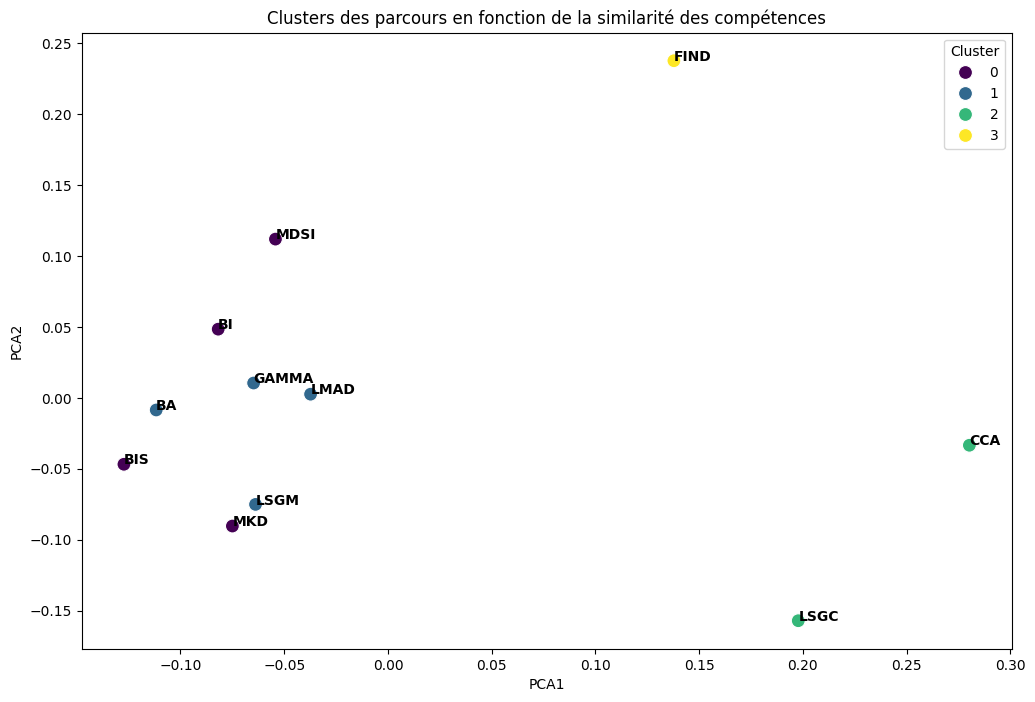

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Réduction de la dimension pour la visualisation
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(similarity_df)

# Ajouter les composantes principales pour la visualisation
competences_esb['PCA1'] = reduced_data[:, 0]
competences_esb['PCA2'] = reduced_data[:, 1]

# Visualisation des clusters avec annotations
plt.figure(figsize=(12, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=competences_esb, palette='viridis', s=100)

# Ajouter les noms des parcours comme annotations
for i in range(competences_esb.shape[0]):
    plt.text(competences_esb['PCA1'][i], competences_esb['PCA2'][i], competences_esb['Parcours'][i],
             horizontalalignment='left', size=10, color='black', weight='semibold')

plt.title('Clusters des parcours en fonction de la similarité des compétences')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Cluster')
plt.show()

In [55]:
# Calculer les distances au centroid le plus proche pour chaque compétence
distances = kmeans.transform(similarity_df)
competences_esb['Distance_to_Cluster'] = distances.min(axis=1)

# Identifier les compétences éloignées (par exemple, les 25% ayant la plus grande distance)
threshold = competences_esb['Distance_to_Cluster'].quantile(0.75)
outliers = competences_esb[competences_esb['Distance_to_Cluster'] > threshold]

# Afficher les compétences éloignées
outliers

,Parcours,Compétences,Cluster,Distance_to_Cluster,PCA1,PCA2
1,LSGM,Analyser les évolutions de l’environnement des...,1,0.184743,-0.063817,-0.075080
5,MKD,Préparer les contenus de la communication (ben...,0,0.182590,-0.074971,-0.090328
7,MDSI,Anticiper et gérer les changements liés à la t...,0,0.197127,-0.054218,0.111938


## Interpretation :
Les points éloignés sont les parcours qui, dans l'espace de similarité entre les compétences, sont les plus distants du centre de leur cluster (le centroïde).
 Cela signifie qu'ils ne sont pas bien représentés par le groupe de compétences du cluster auquel ils appartiennent, ce qui peut indiquer que :

- Les compétences des parcours sont peu similaires aux compétences de competence_ref : Ces parcours ont des compétences qui ne correspondent pas bien aux compétences de référence dans competence_ref, ce qui fait qu'ils se trouvent loin du centroïde du cluster.
- Ces parcours peuvent être considérés comme des outliers dans le contexte de la similarité avec les compétences de competence_ref.
